In [101]:
from qiskit import * 
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%matplotlib inline

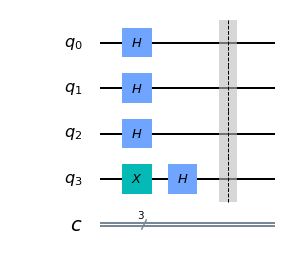

In [102]:
circuit_base = qiskit.QuantumCircuit(4,3)

circuit_base.x(3)
circuit_base.h(range(4))
circuit_base.barrier()

circuit_base.draw(output="mpl")

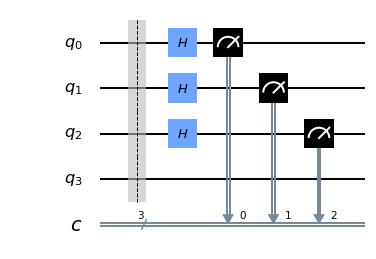

In [103]:
circuit_end = qiskit.QuantumCircuit(4,3)
circuit_end.barrier()
circuit_end.h(range(3))
circuit_end.measure(range(3), range(3))

circuit_end.draw(output="mpl")

In [104]:
# https://qiskit.org/textbook/ch-algorithms/deutsch-josza.html#example
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    return oracle_qc

# Demonstration for a balanced function

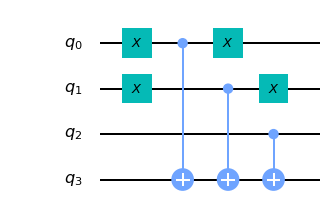

In [105]:
# creates a balanced function circuit
balanced_circuit = dj_oracle("balanced", 3)
balanced_circuit.draw(output="mpl")

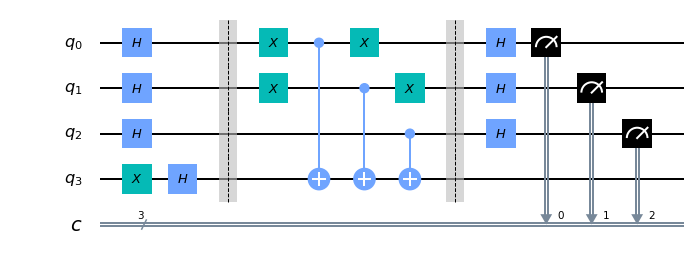

In [106]:
circuit = circuit_base + balanced_circuit + circuit_end

circuit.draw(output="mpl")

In [107]:
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

sim_state_vector = qiskit.execute(circuit, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(circuit, backend=qasm_sim, shots=1).result().get_counts()

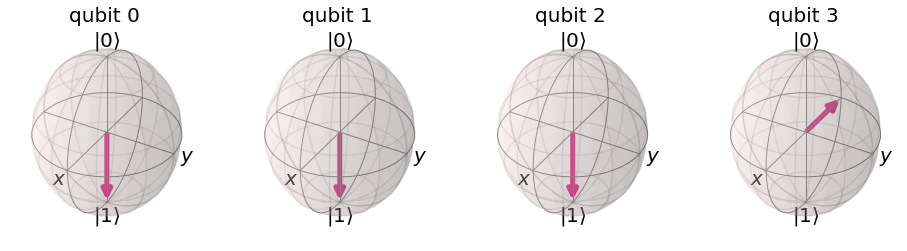

In [108]:
plot_bloch_multivector(sim_state_vector)

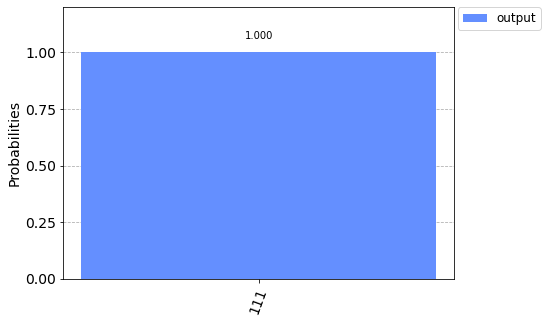

In [109]:
plot_histogram([sim_counts], legend=['output'])

# Demonstration for a constant function

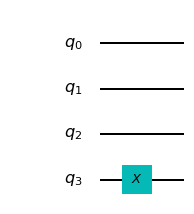

In [115]:
# creates a balanced function circuit
constant_circuit = dj_oracle("constant", 3)
constant_circuit.draw(output="mpl")

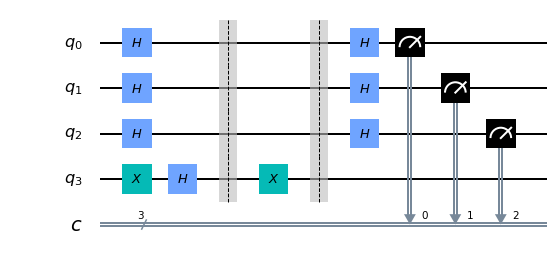

In [116]:
circuit = circuit_base + constant_circuit + circuit_end

circuit.draw(output="mpl")

In [117]:
sim_state_vector = qiskit.execute(circuit, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(circuit, backend=qasm_sim, shots=1).result().get_counts()

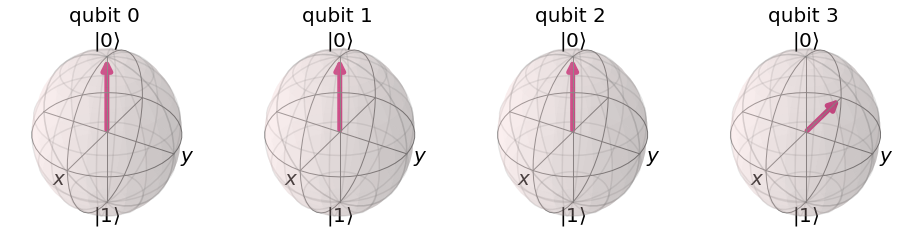

In [118]:
plot_bloch_multivector(sim_state_vector)

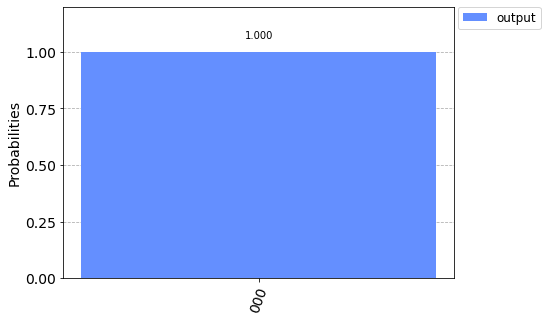

In [119]:
plot_histogram([sim_counts], legend=['output'])